# Importando as Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier

pd.set_option("display.max_columns", None)

# Limpeza dos Dados

In [42]:
dataset = pd.read_csv("survey.csv")

In [43]:
# Descarta colunas não utilizadas. 

dataset = dataset.drop(['Timestamp', 'state', 'comments'], axis= 1)

In [44]:
# Limpeza da coluna gender

dataset['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [45]:
gender = dataset['Gender'].str.lower()
gender = dataset['Gender'].unique()
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in dataset.iterrows():
    if str.lower(col.Gender) in male_str:
        dataset['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)
    if str.lower(col.Gender) in female_str:
        dataset['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)
    if str.lower(col.Gender) in trans_str:
        dataset['Gender'].replace(to_replace=col.Gender, value='other', inplace=True)

dataset = dataset[~dataset['Gender'].isin(['A little about you', 'p'])]

In [46]:
# Limpeza da coluna idade

dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

s = pd.Series(dataset['Age'])
s[s<18] = dataset['Age'].median()
dataset['Age'] = s
s = pd.Series(dataset['Age'])
s[s>120] = dataset['Age'].median()
dataset['Age'] = s

In [47]:
# Remove valores nulos do dataset

dataset['self_employed'] = dataset['self_employed'].replace(['NA'], 'No')
dataset['work_interfere'] = dataset['work_interfere'].replace(['NA'], 'Don\'t know' )


# Análise Exploratória dos Dados

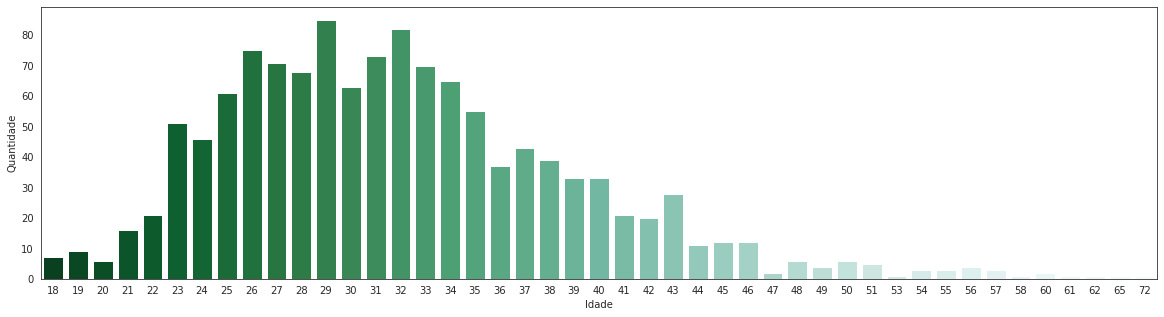

In [49]:
# Idade

sns.set_style('white')
plt.figure(figsize = (20,5))
sns.countplot(x = 'Age', data = dataset, palette='BuGn_r')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

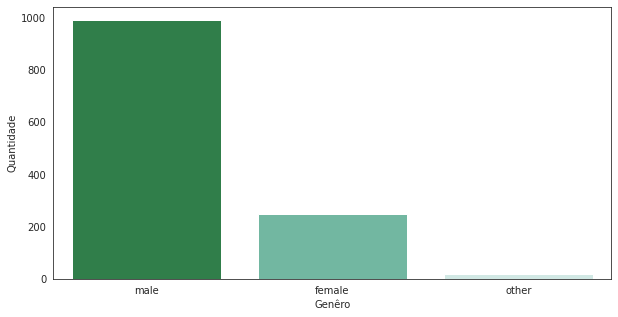

In [50]:
# Gender

sns.set_style('white')
plt.figure(figsize = (10,5))
sns.countplot(x = 'Gender', data = dataset,
              order = dataset['Gender'].value_counts(ascending=False).index, palette='BuGn_r')
plt.xlabel('Genêro')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
# Country

sns.set_style('white')
plt.figure(figsize = (20,5))
sns.countplot(x = 'Country', data = dataset,
              order = dataset['Country'].value_counts(ascending=False)[0:10].index, palette='BuGn_r')
plt.xlabel('Países')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
# Self Employed

sns.set_style('white')
plt.figure(figsize = (10,5))
sns.countplot(x = 'self_employed', data = dataset,
              order = dataset['self_employed'].value_counts(ascending=False).index, palette='BuGn_r')
plt.xlabel('Trabalha como autônomo')
plt.ylabel('Quantidade')
plt.show()

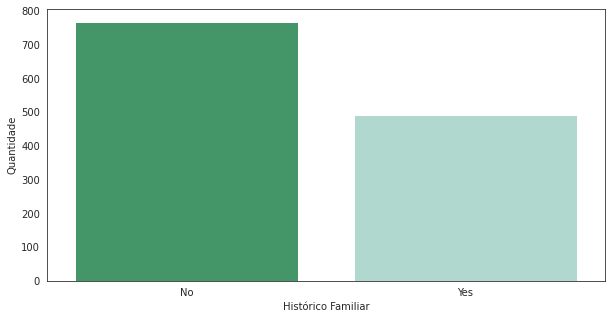

In [12]:
# Family History

sns.set_style('white')
plt.figure(figsize = (10,5))
sns.countplot(x = 'family_history', data = dataset,
              order = dataset['family_history'].value_counts(ascending=False).index, palette='BuGn_r')
plt.xlabel('Histórico Familiar')
plt.ylabel('Quantidade')
plt.show()

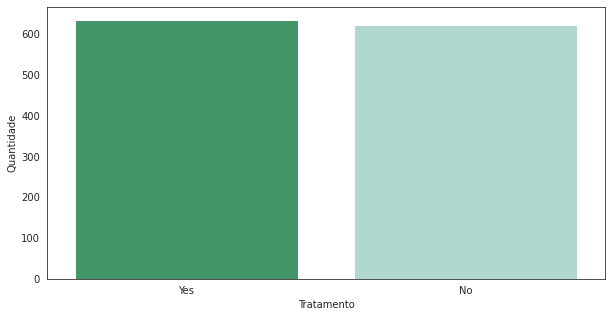

In [13]:
# Treatment

sns.set_style('white')
plt.figure(figsize = (10,5))
sns.countplot(x = 'treatment', data = dataset,
              order = dataset['treatment'].value_counts(ascending=False).index, palette='BuGn_r')
plt.xlabel('Tratamento')
plt.ylabel('Quantidade')
plt.show()

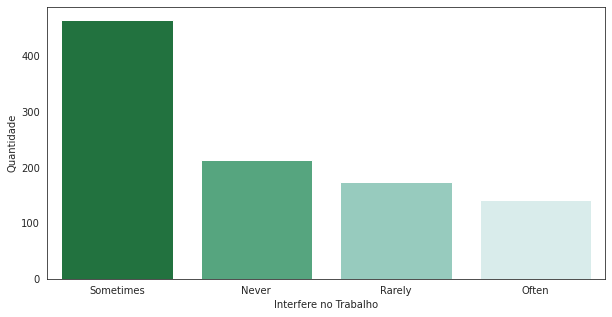

In [14]:
# Work Interfere

sns.set_style('white')
plt.figure(figsize = (10,5))
sns.countplot(x = 'work_interfere', data = dataset,
              order = dataset['work_interfere'].value_counts(ascending=False).index, palette='BuGn_r')
plt.xlabel('Interfere no Trabalho')
plt.ylabel('Quantidade')
plt.show()

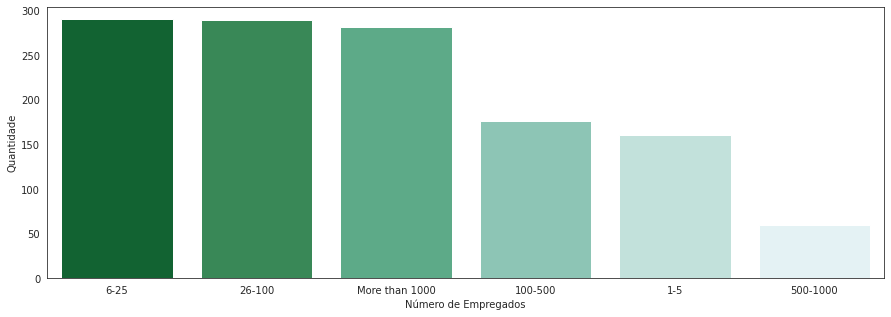

In [15]:
# Number of Employes

sns.set_style('white')
plt.figure(figsize = (15,5))
sns.countplot(x = 'no_employees', data = dataset,
              order = dataset['no_employees'].value_counts(ascending=False).index, palette='BuGn_r')
plt.xlabel('Número de Empregados')
plt.ylabel('Quantidade')
plt.show()

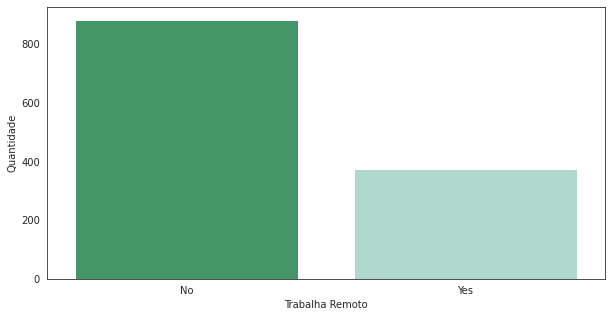

In [16]:
# Remote Work

sns.set_style('white')
plt.figure(figsize = (10,5))
sns.countplot(x = 'remote_work', data = dataset,
              order = dataset['remote_work'].value_counts(ascending=False).index, palette='BuGn_r')
plt.xlabel('Trabalha Remoto')
plt.ylabel('Quantidade')
plt.show()

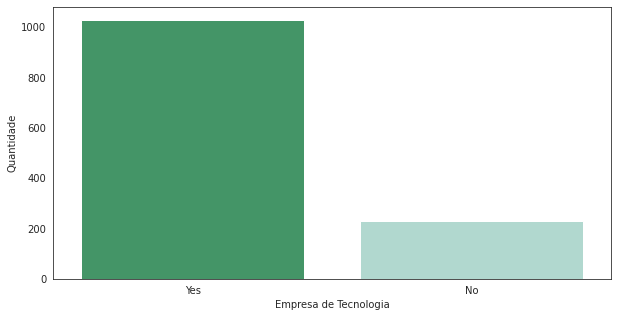

In [17]:
# Tech Company

sns.set_style('white')
plt.figure(figsize = (10,5))
sns.countplot(x = 'tech_company', data = dataset,
              order = dataset['tech_company'].value_counts(ascending=False).index, palette='BuGn_r')
plt.xlabel('Empresa de Tecnologia')
plt.ylabel('Quantidade')
plt.show()

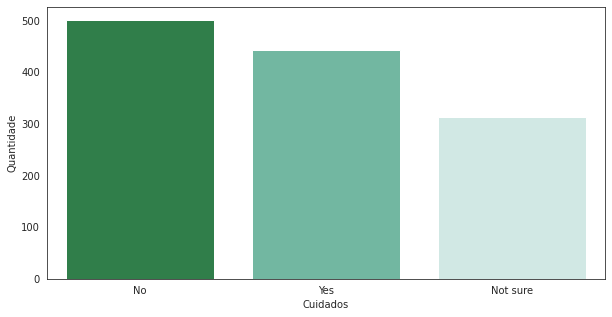

In [19]:
# Care Options

sns.set_style('white')
plt.figure(figsize = (10,5))
sns.countplot(x = 'care_options', data = dataset,
              order = dataset['care_options'].value_counts(ascending=False).index, palette='BuGn_r')
plt.xlabel('Cuidados')
plt.ylabel('Quantidade')
plt.show()

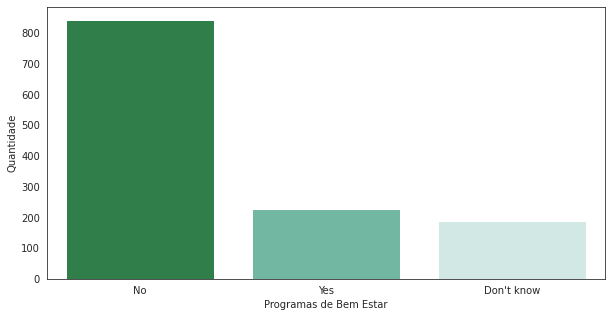

In [20]:
# Wellness Program

sns.set_style('white')
plt.figure(figsize = (10,5))
sns.countplot(x = 'wellness_program', data = dataset,
              order = dataset['wellness_program'].value_counts(ascending=False).index, palette='BuGn_r')
plt.xlabel('Programas de Bem Estar')
plt.ylabel('Quantidade')
plt.show()

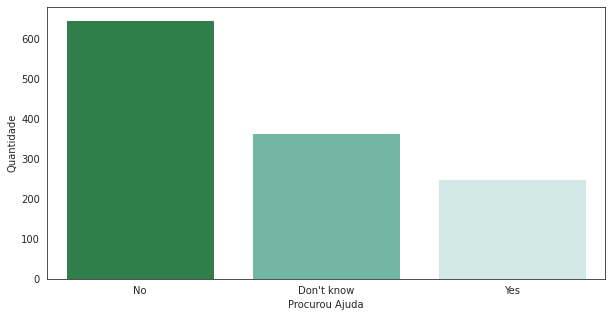

In [21]:
# Seek Help

sns.set_style('white')
plt.figure(figsize = (10,5))
sns.countplot(x = 'seek_help', data = dataset,
              order = dataset['seek_help'].value_counts(ascending=False).index, palette='BuGn_r')
plt.xlabel('Procurou Ajuda')
plt.ylabel('Quantidade')
plt.show()

## Encoding Categorical Data

In [23]:
#Encoding data

object_cols = ['Gender', 'Country','self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

le = LabelEncoder()

for col in object_cols:
    le.fit(dataset[col])
    dataset[col] = le.transform(dataset[col])

/tmp/ipykernel_79833/377678233.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

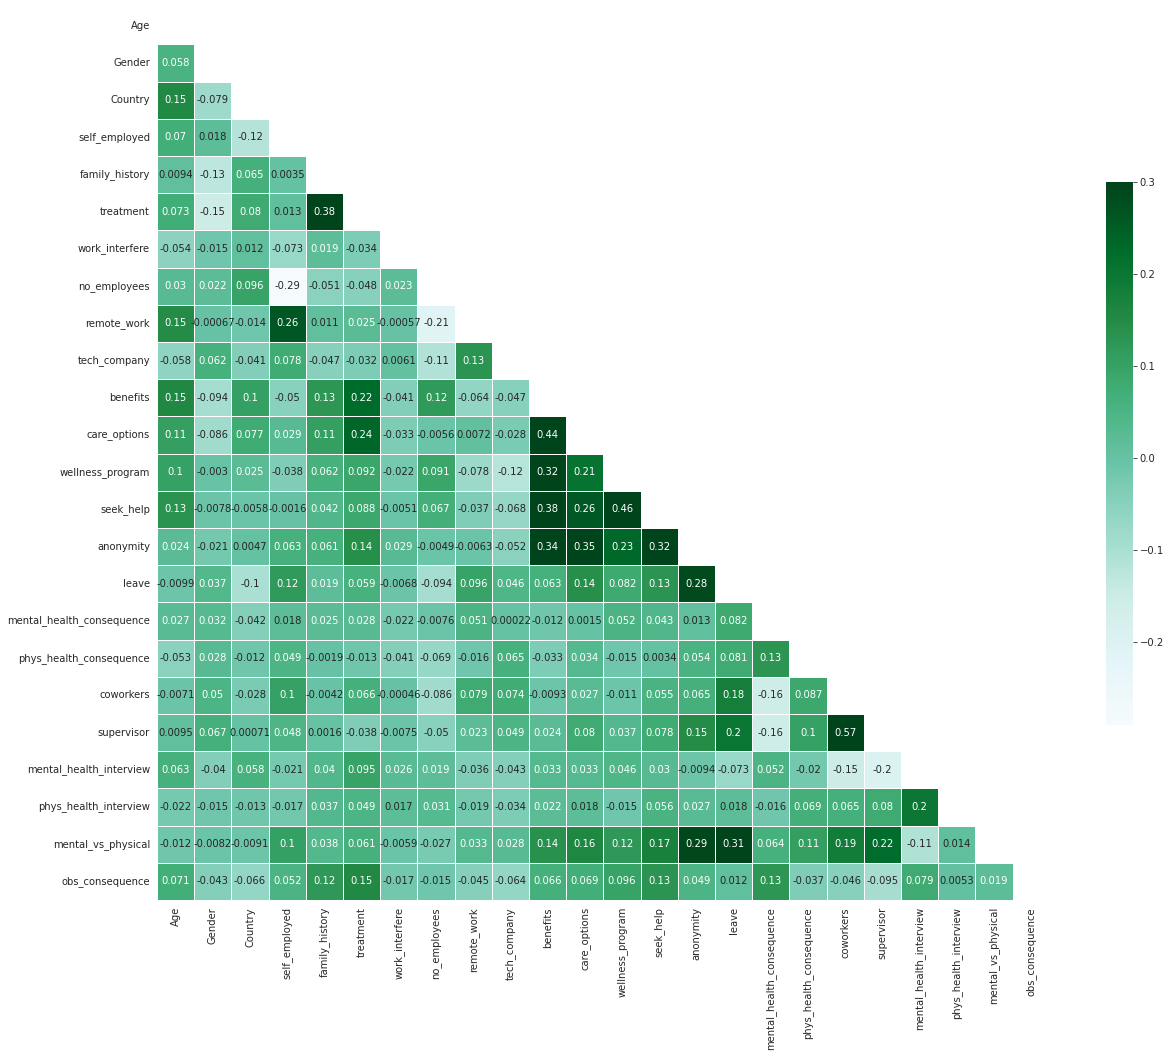

In [24]:
# Correlation Matrix

corr = dataset.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

# Heatmap
sns.heatmap(corr, mask=mask, cmap='BuGn', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [25]:
cols = corr.nlargest(10, 'treatment')['treatment'].index
print(cols)

Index(['treatment', 'family_history', 'care_options', 'benefits',
       'obs_consequence', 'anonymity', 'mental_health_interview',
       'wellness_program', 'seek_help', 'Country'],
      dtype='object')


Acima podemos observar que as 10 colunas que apresentam maior correlação com a coluna tratamento.

In [26]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

s = StandardScaler()

dataset['Age'] = s.fit_transform(dataset[['Age']])
dataset.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.678065,0,44,2,0,1,1,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0
1,1.641148,1,44,2,0,0,2,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,-0.009851,1,6,2,0,0,2,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0
3,-0.147434,1,43,2,1,1,1,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1
4,-0.147434,1,44,2,0,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0


# Criação do Modelo

In [27]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = dataset[feature_cols]
y = dataset.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [28]:
X_all = dataset.drop('treatment', axis=1)
y_all = dataset.treatment

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.30, random_state=0)

# SVM

In [29]:
# Todos os dados
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_all, y_train_all)
y_pred_all = classifier.predict(X_test_all)
accuracy_score(y_test_all, y_pred_all)

0.6402116402116402

In [30]:
# Dados selecionados

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8068783068783069

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [32]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.8396038961038961


# KNN 

In [33]:
# Todos os dados

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_all, y_train_all)
y_pred_all = classifier.predict(X_test_all)
accuracy_score(y_test_all, y_pred_all)

0.671957671957672

In [34]:
# Dados selecionados 

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.7777777777777778

In [35]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [36]:
print(grid.best_params_)
print(grid.best_score_)

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
0.7929465301478954
